In [1]:
from PIL import Image
from matplotlib.pyplot import imshow
from pathlib import Path
from tqdm import tqdm
import numpy as np
from os import scandir, walk
from skimage import io
import os 
import pandas as pd

In [24]:
# This function clips the RGB bands and maps the remaining values to the [0, 255] range
def visualize_all_bands(raw, bands=[3,2,1], min_map=0, max_map=2000, nmin=0, nmax=255):
    scale = (nmax-nmin) / (max_map-min_map)
    
 
    seg = raw[...,bands]
    
    seg = np.clip(seg, min_map, max_map)
    
    
    
    for i in range(seg.shape[-1]):
        print(f'Working on dim {i}')
        seg[..., i] = seg[..., i] * scale + nmin - min_map * scale
    
    
    return seg.astype(int)

In [25]:
test1 = 'data/kansas-13bands/tile_21600_11700.tif'

In [26]:
raw = io.imread(str(test1))

In [27]:
raw.shape

(908, 1154, 13)

Working on dim 0
Working on dim 1
Working on dim 2


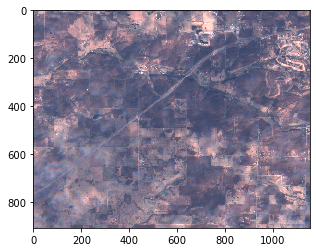

In [28]:
imshow(visualize_all_bands(raw))

In [10]:
from skimage import transform

In [21]:
nraw = transform.resize(raw, (500,500), preserve_range=True)

In [29]:
nraw.shape

(500, 500, 13)

Working on dim 0
Working on dim 1
Working on dim 2


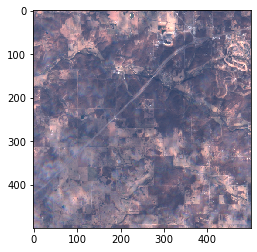

In [30]:
imshow(visualize_all_bands(nraw))